     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

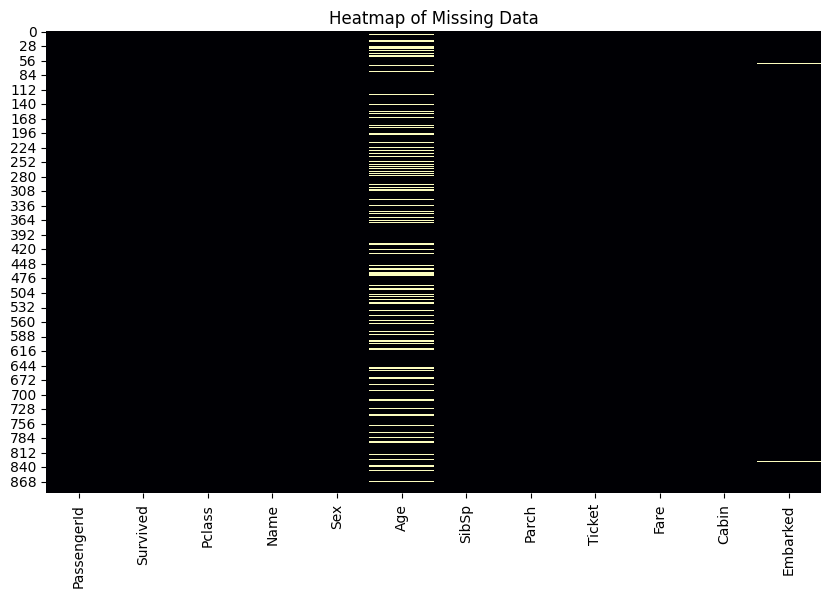

/var/folders/mb/6jrwqwqx5jb17mxsj9lsrf1h0000gn/T/ipykernel_75295/1926713355.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
/var/folders/mb/6jrwqwqx5jb17mxsj9lsrf1h0000gn/T/ipykernel_75295/1926713355.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

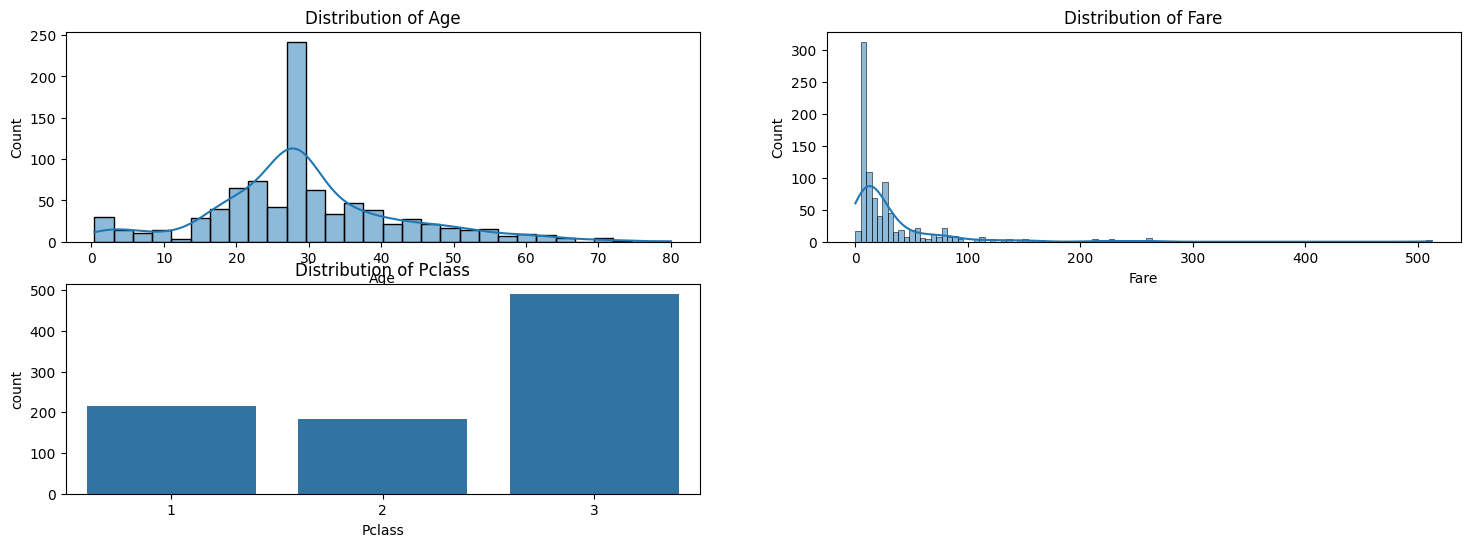

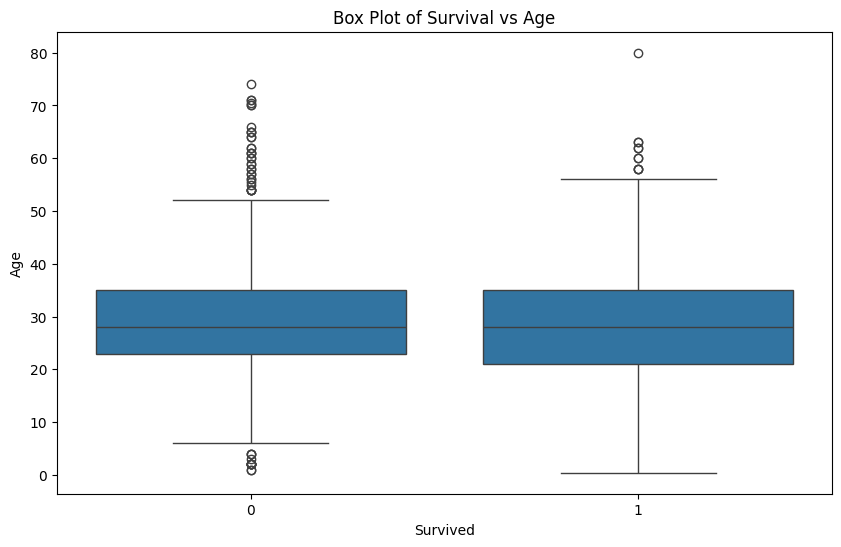

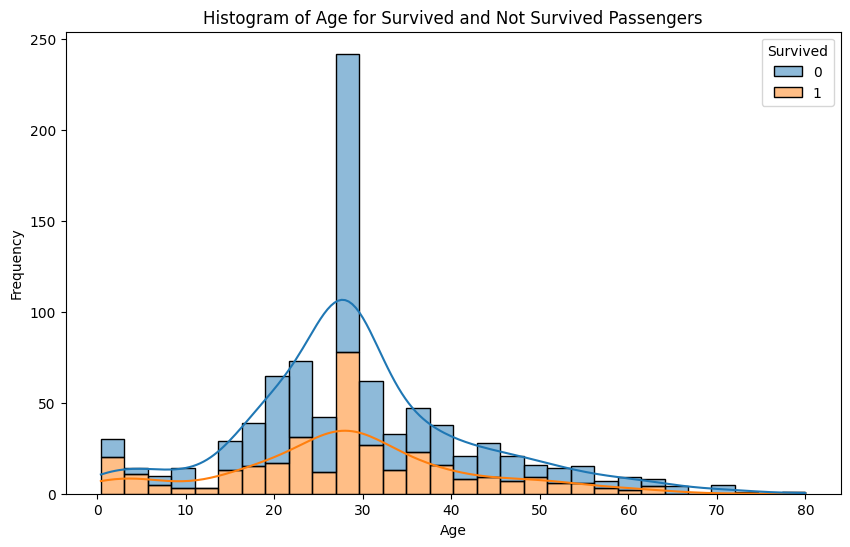

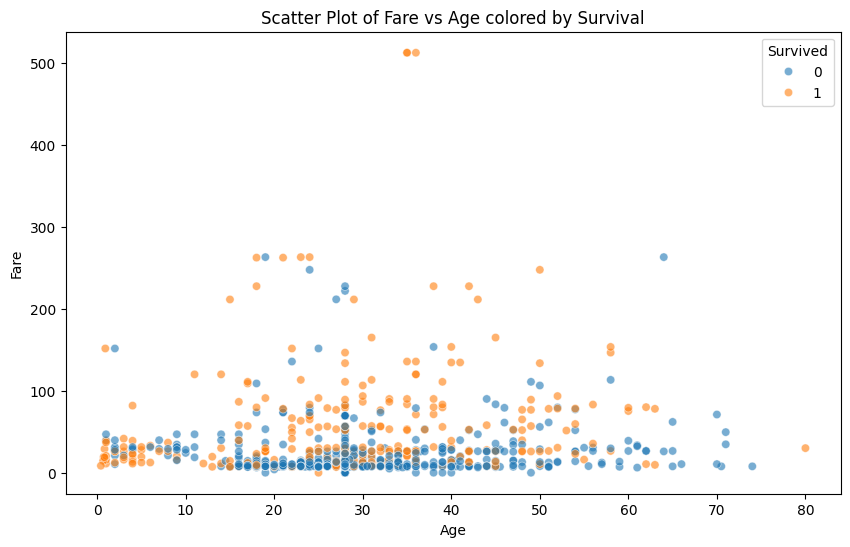

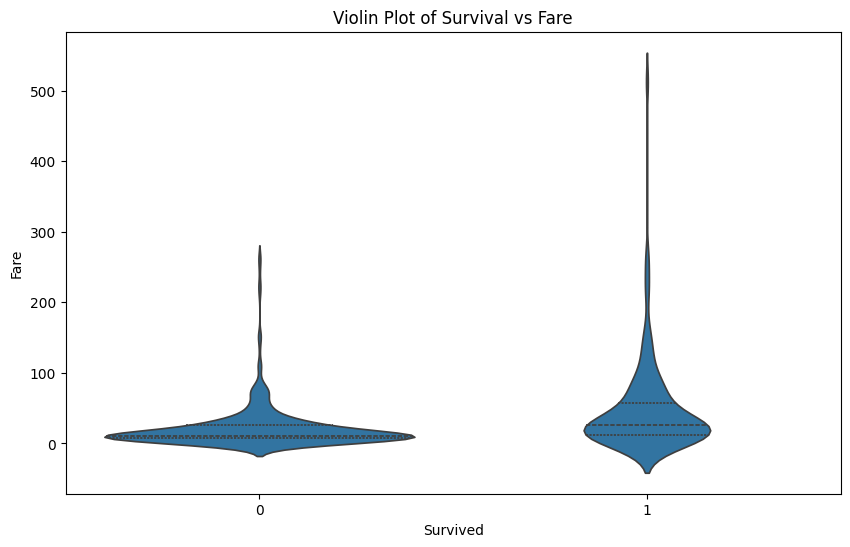

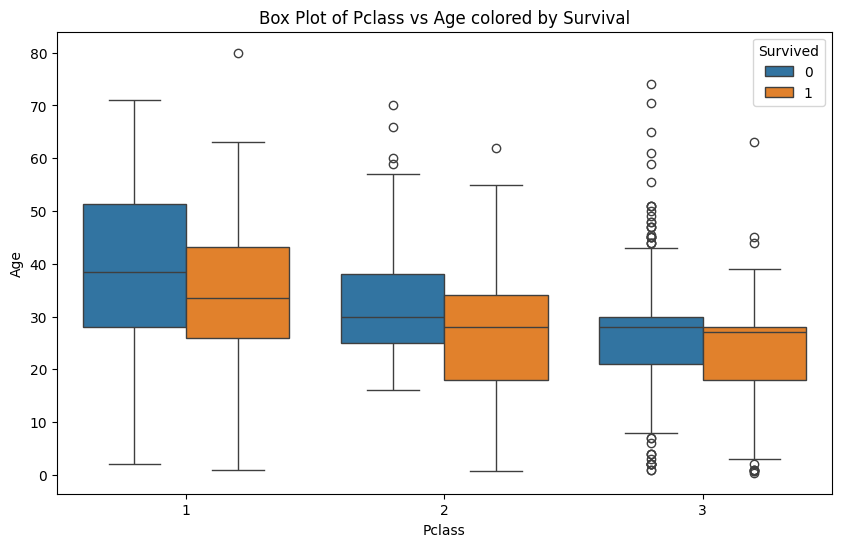

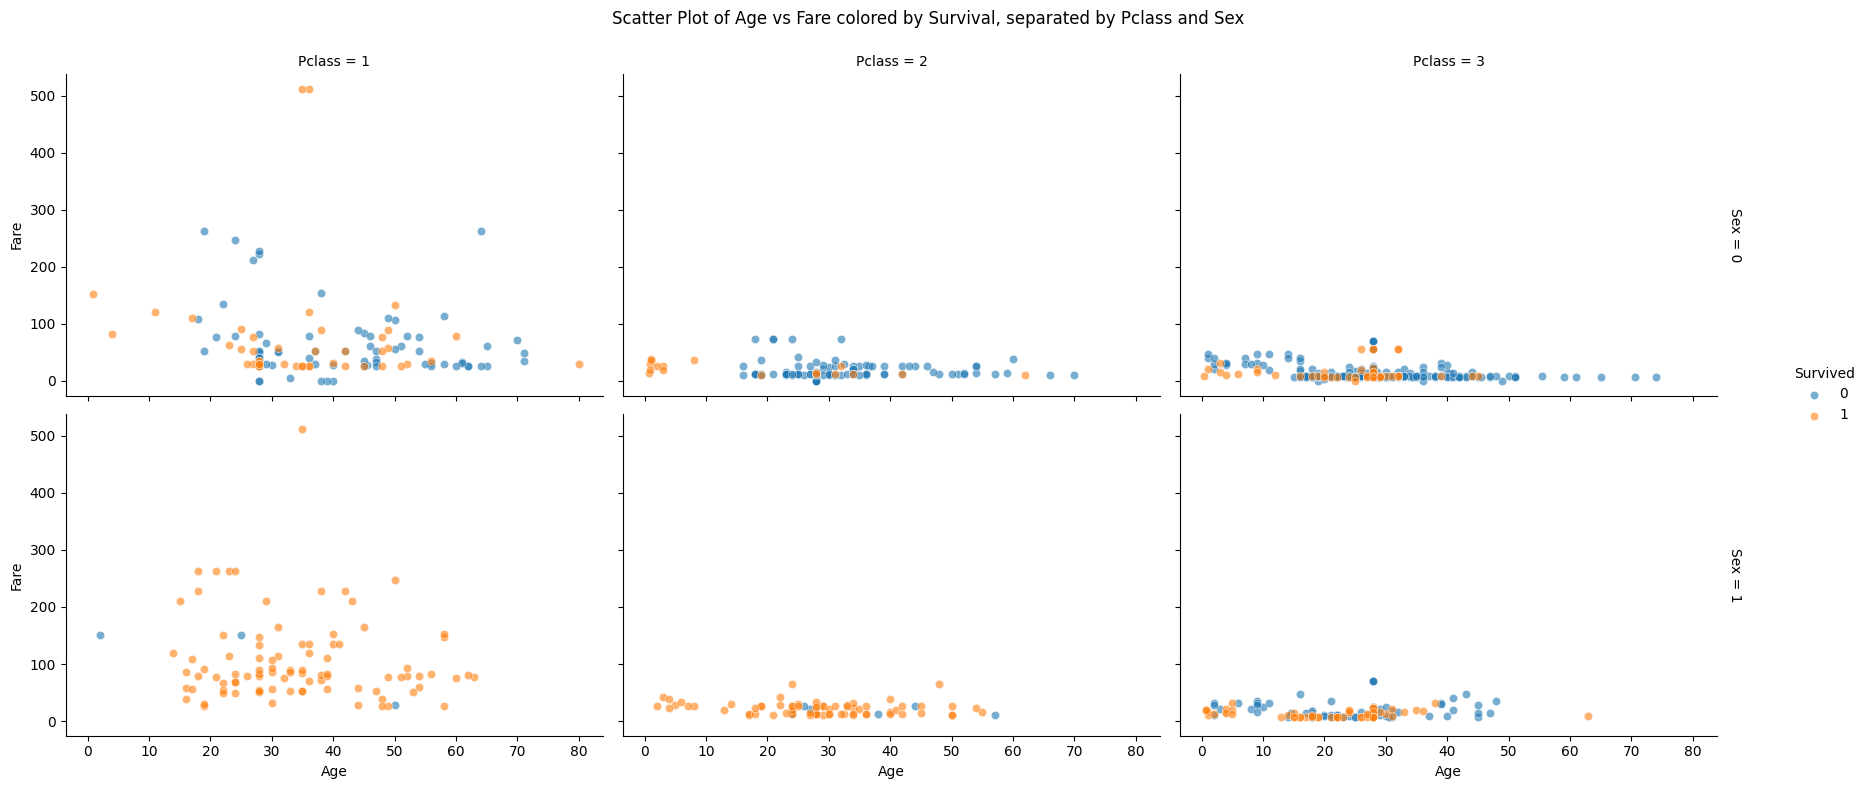

<Figure size 1500x500 with 0 Axes>

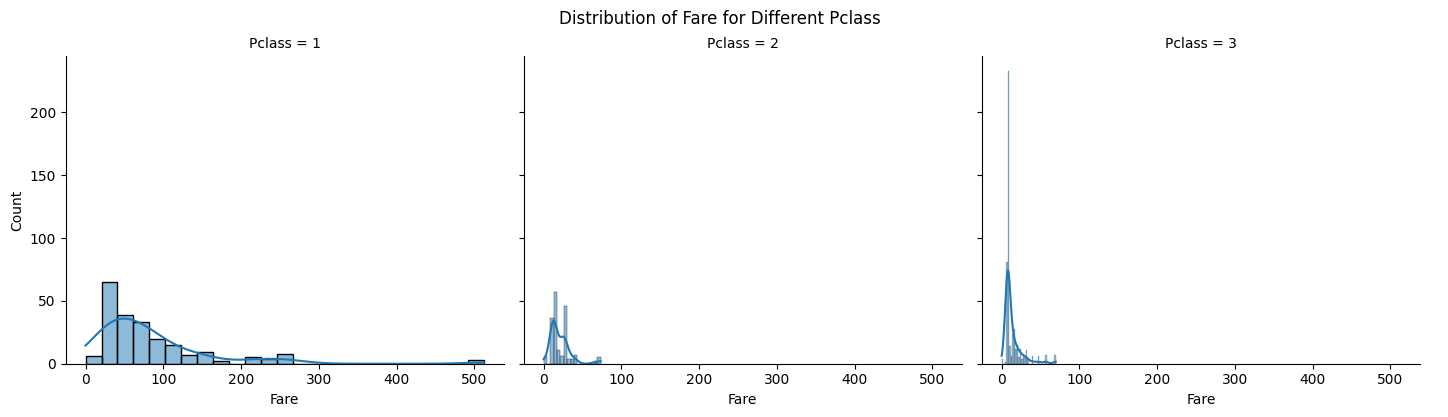

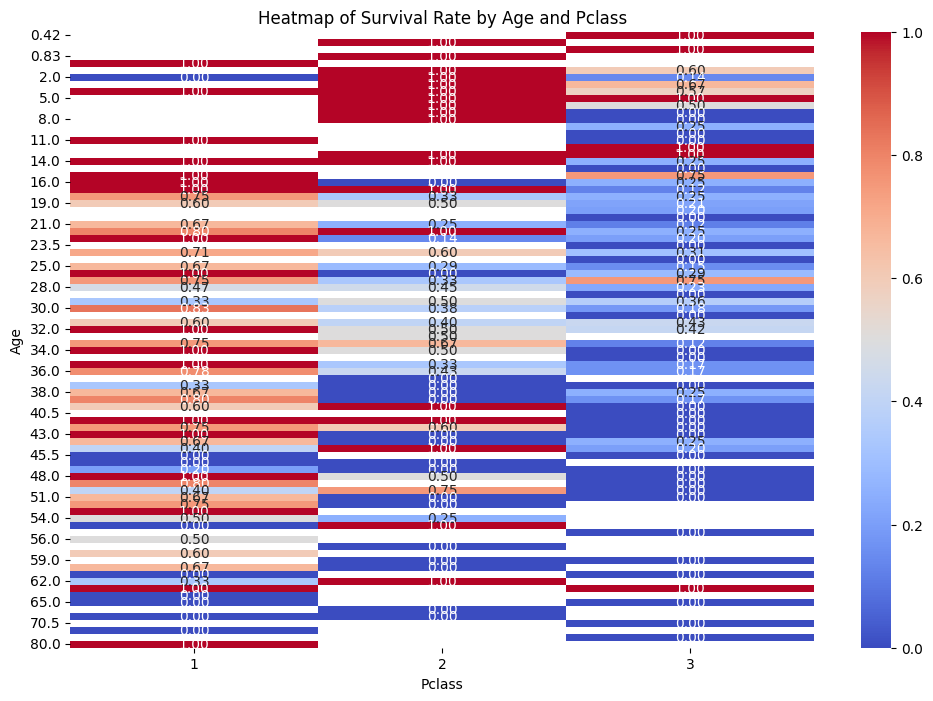

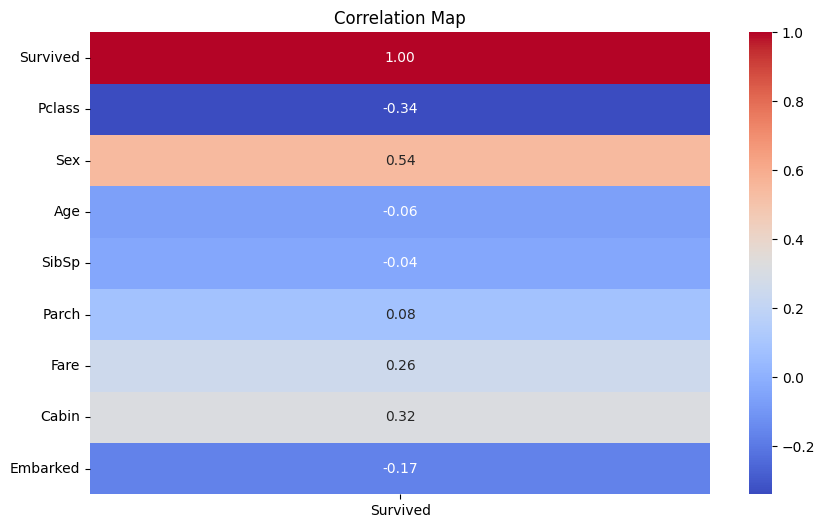

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../../../resources/project/titanic.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df)
print(df.describe())


# Display data types
print(df.dtypes)


# Clean DataFrame
df_cleaned = df.drop_duplicates(subset=['Name'])

# Change Survival type for next steps
# df_cleaned['Survived'] = df_cleaned['Survived'].astype('category')
df_cleaned['Survived'] = df_cleaned['Survived'].astype(int)

# For Correlation

df_cleaned['Sex'] = df_cleaned['Sex'].map({'male':0,'female':1})
df_cleaned['Embarked'] = df_cleaned['Embarked'].map({'C':1,'Q':2,'S':3})
df_cleaned['Cabin'] = df_cleaned['Cabin'].apply(lambda  x:0 if pd.isna(x) else 1)
df_cleaned['Cabin'] = df_cleaned['Cabin'].astype(int)







# # missing data
missing_data = df_cleaned.isnull()
print(f'missed data: {missing_data.sum()}')

plt.figure(figsize = (10,6))
sns.heatmap(missing_data,cbar = False, cmap = 'magma')
plt.title('Heatmap of Missing Data')
plt.show()

df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df_cleaned['Fare'].fillna(df_cleaned['Fare'].median(), inplace=True)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)
df_cleaned['Cabin'].fillna('No-Cab', inplace=True)








# 2.Exploratory Data Analysis (EDA)
# Plot distributions

plt.figure(figsize = (18,6))

# Age :continuous
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Age'].dropna(),kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')

# Fare: continuous
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Fare'].dropna(),kde = True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')

# Pclass : discrete
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=df_cleaned)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')


# 2.b Compare Survival

# Box Plot: Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df_cleaned)
plt.title('Box Plot of Survival vs Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Histogram: Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Histogram of Age for Survived and Not Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Fare vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Fare vs Age colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Violin Plot: Survived vs Fare
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df_cleaned, inner='quartile')
plt.title('Violin Plot of Survival vs Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


# 2.c

# Box Plot: 'Survived' vs 'Pclass' separated by 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df_cleaned)
plt.title('Box Plot of Pclass vs Age colored by Survival')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

# Scatter Plot: 'Age' vs 'Fare' colored by 'Survived' and separated by 'Pclass' and 'Sex'
g = sns.FacetGrid(df_cleaned,row = "Sex",col="Pclass", hue="Survived", height=4, aspect=1.5, margin_titles=True)
g.map(sns.scatterplot, "Age", "Fare", alpha=0.6)
g.add_legend()
g.set_axis_labels("Age", "Fare")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of Age vs Fare colored by Survival, separated by Pclass and Sex')
plt.show()


# 2.d

plt.figure(figsize=(15, 5))
g = sns.FacetGrid(df_cleaned, col="Pclass", height=4, aspect=1.2)
g.map(sns.histplot, "Fare", kde=True)
g.add_legend()
g.set_axis_labels("Fare", "Count")
g.fig.suptitle('Distribution of Fare for Different Pclass', y=1.03)
plt.show()




# Group data by 'Age' and 'Pclass' and calculate the survival rate
df_grouped = df_cleaned.groupby(['Age', 'Pclass']).agg({'Survived': 'mean'}).reset_index()
df_grouped.rename(columns={'Survived': 'Survival Rate'}, inplace=True)



heatmap = df_grouped.pivot(index='Age', columns='Pclass', values='Survival Rate')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Heatmap of Survival Rate by Age and Pclass')
plt.show()



# Calculate correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['PassengerId'])
correlation_matrix = numeric_cols.corr()


# Analyze the correlation map results
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Survived']],  cmap='coolwarm' ,annot = True, fmt=".2f" )
plt.title('Correlation Map')
plt.show()







